# Clustered dotplots

In [1]:
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png", ".svg")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

## Get data

In [3]:
ds <- data.table::fread("diffSplice_enrichment_analysis.txt") %>%
    mutate_if(is.character, as.factor)
ds$Tissue <- factor(ds$Tissue, levels=c("Caudate", "Dentate Gyrus", "DLPFC", "Hippocampus"))
ds$Feature <- factor(ds$Feature, levels=c("Gene", "Transcript", "Exon", "Junction"))
ds$Tissue <- fct_relevel(ds$Tissue, rev)

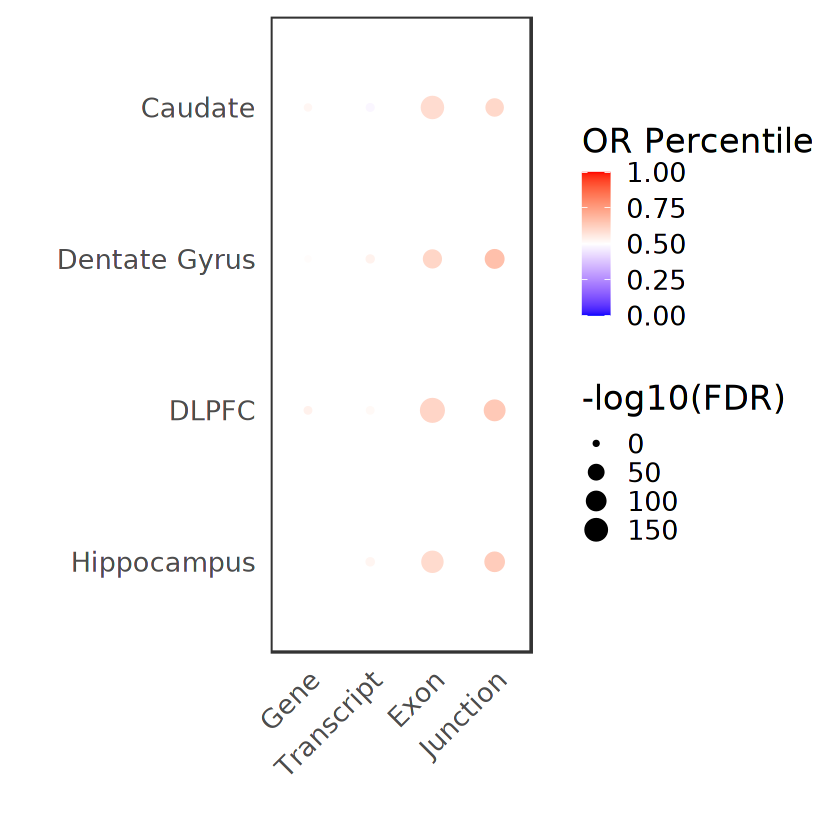

In [4]:
dotplot <- ds %>% 
    mutate(`-log10(FDR)` = -log10(FDR), `OR Percentile` = OR / (1+OR)) %>% 
    ggplot(aes(y=Tissue, x=Feature, color=`OR Percentile`, size=`-log10(FDR)`)) + 
    geom_point() + ylab('') + xlab('') +
    scale_color_gradient2(midpoint = 0.5, low = "blue", mid = "white",
                          high = "red", space = "Lab", limits=c(0,1) ) +
    theme_bw(base_size=20) + 
    theme(axis.line  = element_blank(), 
          axis.text.x = element_text(angle = 45, hjust=1), 
          axis.ticks = element_blank(), 
          legend.position="right", 
          panel.grid = element_blank(), 
          strip.text=element_text(face="bold"))
save_plot(dotplot, "dotplot_enrichment_diffSplice", 9, 5)
dotplot

## Reproducibility Information

In [5]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-08-24 12:31:04 EDT"

   user  system elapsed 
  3.423   0.160   3.910 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-08-24                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 broom         0.7.8    2021-06-24 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 4.0.2)
 cellranger    1.1.0    2016-07-27 [1] CRAN (R 